<a href="https://pandas.pydata.org/"><img src="https://saltfarmer.github.io/blog/assets/images/pandas-head.jpg"></a>

Pandas - это библиотека для языка программирования Python, которая предоставляет инструменты для анализа, манипулирования и обработки данных.

Основными объектами в Pandas являются DataFrame и Series. DataFrame - это двумерная таблица, которая содержит данные различных типов. DataFrame также содержит метки для строк и столбцов. Series представляет собой единственный столбец с данными, также содержащий метки.

Pandas также предоставляет инструменты для чтения и записи данных из различных источников, таких как CSV, Excel, базы данных, веб-API и других форматов данных.

Установить библиотеку Pandas в Python можно выполнив в терминале

`pip install pandas`

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Загрузка данных

Загрузим данные из файла data.csv формата CSV (Comma-separated values), расположенного на локальном диске. Фактически это текстовый файл, в котором задана таблица, строки которой разделены переносом на новую строку, а столбцы разделены запятыми. Откройте этот файл в текстовом редакторе и просмотрите его. Убедитесь, что это такие же данные, какие были сгенерированы в файле matplotlib_examples.ipynb. Вы можете также открыть файл data.csv в Microsoft Excel.

Для того, чтобы загрузить данные из файла формата CSV используется функция `read_csv()` в которую передается в качестве аргумента путь к файлу. Функция возвращает объект класса `DataFrame`.

Загрузка данных из файла, расположенного на локальном диске

In [33]:
data = pd.read_csv('data.csv')
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [34]:
# посмотрим на загруженные данные
data.head()     # просмотр первых пяти строк
# data          # просмотр данных целиком

,# x,y1,y2,y3
0,-5.0,-125.0,100.0,-62.5
1,-4.0,-100.0,64.0,-32.0
2,-3.0,-75.0,36.0,-13.5
3,-2.0,-50.0,16.0,-4.0
4,-1.0,-25.0,4.0,-0.5


Загрузка данных из файла, расположенного в репозитории GitHub

In [36]:
housing = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv')

## Обзор данных

In [37]:
housing.head()  # вывод первых пяти образцов

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


При помощи метода `info()` можно увидеть, сколько всего образцов, сколько атрибутов, какое количество непустых значений параметров, какие у них типы данных:

In [38]:
housing.info()  # вывод информации об атрибутах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Статистическое описание атрибутов можно посмотреть при помощи метода `describe()`.<br>
mean - среднее значение<br>
min - минимальное значение<br>
max - максимальное значение

In [39]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


При помощи метода `value_counts()` можно посмотреть распределение значений для отдельного признака: список принимаемых признак значений, и количество образцов с этим значением. Это полезно, когда принимаемых значений не так много. Обычно это касается категориальных признаков, таких как `ocean_proximity` в данных `housing`. Заметим, что доступ к столбцу признака производится по ключу, подобно тому, как это делается в словарях (dict).

In [40]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Метод `hist()` позволяет визуализировать распределение значений признака. Сравните значения, полученные в предыдущей ячейке с кодом со значениями на диаграмме:

<Axes: >

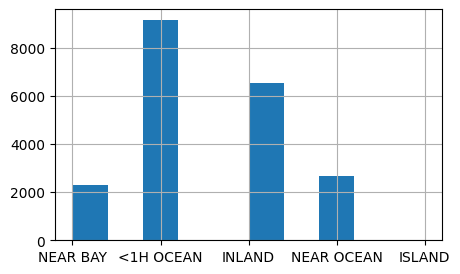

In [41]:
housing['ocean_proximity'].hist(figsize=(5, 3))

Особенно полезен метод `hist()` для числовых признаков, когда принимаемых значений очень много, и метод `value_counts()` уже не выводит удобные для восприятия данные. Попробуйте вместо `hist()` вызвать метод `value_counts()` и посмотрите результат.

<Axes: >

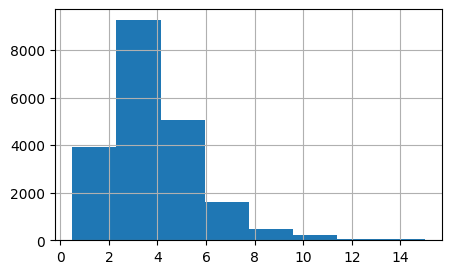

In [42]:
housing['median_income'].hist(bins=8, figsize=(5,3))

Если вызвать метод `hist()` непосредственно у объекта класса `DataFrame`, то будут визуализировано распределение всех числовых признаков:

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

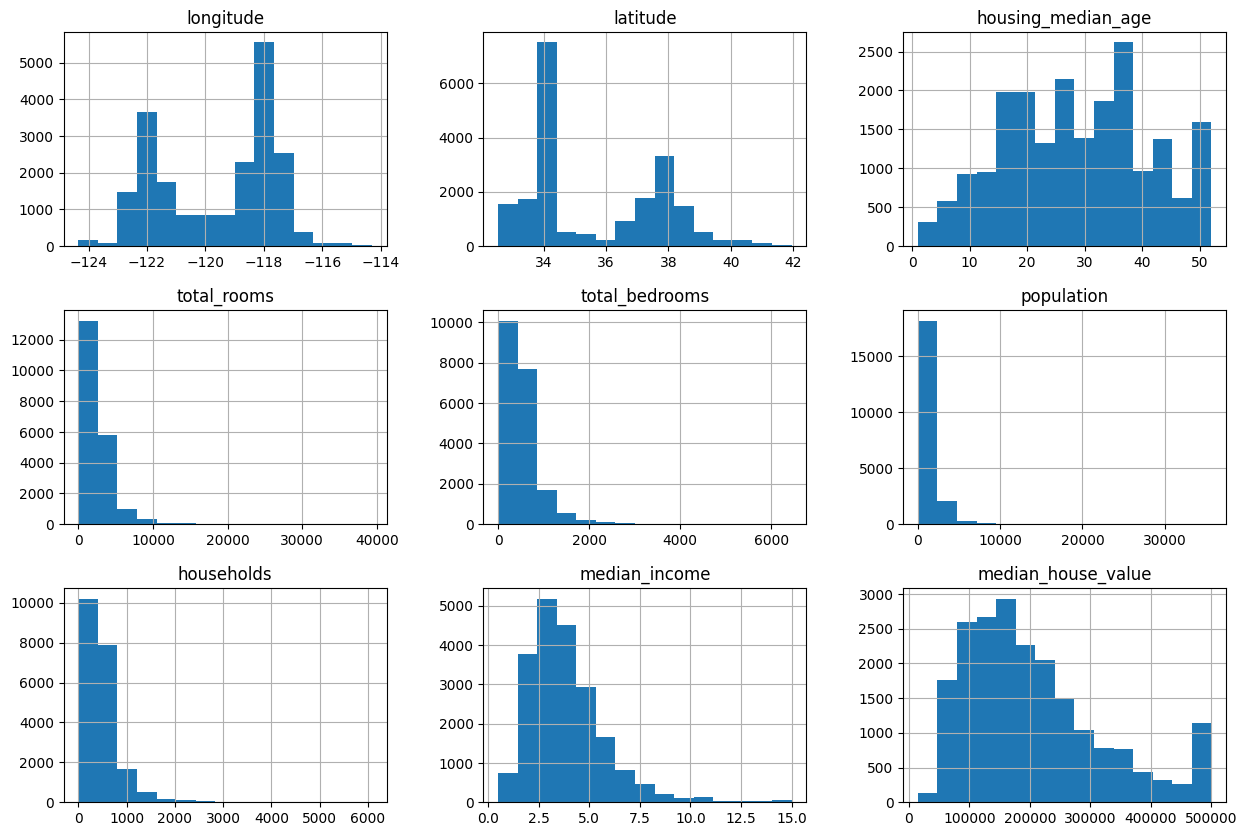

In [43]:
housing.hist(bins=15, figsize=(15, 10))

## Series

Если извлечь из объекта `DataFrame` данные одного из атрибутов (столбец), получим объект `Series`.

In [44]:
s = housing['latitude']
type(s)

pandas.core.series.Series

In [45]:
s.info()

<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: latitude
Non-Null Count  Dtype  
--------------  -----  
20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


## Решение проблемы с отсутствующими признаками

Большинство алгоритмов машинного обучения не могут работать с отсутствующими признакми; в нашем случае мы видели, что у атрибута `total_bedrooms` отсутствовали признаки для некоторого подмножества образцов. Можно исправить ситуацию несколькими способами:

1. избавиться от образцов, у которых отсутствуют признаки total_bedrooms:<br>
`housing.dropna(subset=["total_bedrooms"])`<br>

2. избавиться от самого атрибута total_bedrooms:<br>
`housing.drop("total_bedrooms", axis=1)`

3. заполнить отсутствующие признаки значениями (нулями, средним арифметическим, и тд.):<br>
`mean = housing["total_bedrooms"].mean()`<br>
`housing["total_bedrooms"].fillna(mean)`<br>
в последнем случае значение mean следует сохранить до конца вычислений, так как для заполненных данных пересчет этого значения может дать уже другое значение.

Окончание -`na` в этих методав является аббревиатурой Not Available (нет в наличии). Такие методы оказывают влияние только на те ячейки таблицы данных, в которых отсутствуют значения.

In [46]:
# удаление образцов с отсутствующими значениями признака total_bedrooms
cleared_housing = housing.dropna(subset=["total_bedrooms"])

In [47]:
cleared_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [48]:
# удаление признака total_bedrooms 
cleared_housing = housing.drop(["total_bedrooms", "ocean_proximity"], axis=1)

In [49]:
cleared_housing.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0


In [55]:
filled_housing = housing.copy(deep=True)
# получение среднего арифметического значений признака
mean = filled_housing["total_bedrooms"].mean()
# заполнение отсутствующих ячеек признака total_bedrooms значением mean
filled_housing["total_bedrooms"] = filled_housing["total_bedrooms"].fillna(mean)

## Отделение целевого признака

Извлекаем данные целевого признака в виде одномерного массива NumPy и записываем их в переменную `y`. Остальные признаки извлекаем в виде двумерного массива NumPy и записываем в `X`.

In [63]:
X = cleared_housing.drop(columns=['median_house_value']).to_numpy()
y = cleared_housing['median_house_value'].to_numpy()                # целевой признак

In [65]:
print(X[:3])

[[-122.23     37.88     41.      880.      322.      126.        8.3252]
 [-122.22     37.86     21.     7099.     2401.     1138.        8.3014]
 [-122.24     37.85     52.     1467.      496.      177.        7.2574]]


In [58]:
print(y[:3])

[452600. 358500. 352100.]
